# 📊 Hotel Booking Cancellation Analysis Project

**Objective:**  
High cancellation rates are leading to significant revenue loss.  
The goal is to analyze patterns behind cancellations and provide **data-driven business insights** to help reduce cancellations and improve revenue.


## 🔄 Project Workflow

1. Define Problem Statement  
2. Load & Understand Data  
3. Clean & Preprocess Data  
4. Exploratory Data Analysis (EDA)  
5. Feature Engineering  
6. Insights & Business Interpretation  
7. Revenue Impact & KPIs  
8. Final Recommendations  

# Importing Libraries

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading The Dataset

In [151]:
df=pd.read_csv('Hotel Booking Analysis/hotel_bookings 2.csv')

# Exploratory Data Analysis

In [152]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [153]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


In [154]:
df.shape

(119390, 32)

In [155]:
df.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [157]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'],dayfirst=True)

## changing the reservation_status_date datatype from object to datetime format

In [158]:
(df['reservation_status_date'].head(10))

0   2015-07-01
1   2015-07-01
2   2015-07-02
3   2015-07-02
4   2015-07-03
5   2015-07-03
6   2015-07-03
7   2015-07-03
8   2015-05-06
9   2015-04-22
Name: reservation_status_date, dtype: datetime64[ns]

In [159]:
df.describe(include ='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [160]:
for col in df.describe (include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

## Check Missing Values

In [161]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [162]:
df.drop(['company','agent'], axis=1,inplace=True)
df.dropna(inplace=True)

In [163]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [164]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


## Remove Outliers

In [165]:
df=df[df['adr']<5000]

In [166]:
df['adr'].describe()
df['adr'].max()
df['adr'].min()

-6.38

In [167]:
df['adr'].max()

510.0

In [168]:
df['adr'].describe()

count    118897.000000
mean        101.958683
std          48.091199
min          -6.380000
25%          70.000000
50%          95.000000
75%         126.000000
max         510.000000
Name: adr, dtype: float64

## Create Revenue Feature

In [169]:
df['total_revenue'] = df['adr'] * (df['stays_in_week_nights'] + df['stays_in_weekend_nights'])


## Metrics Overview

In [170]:
total_bookings = len(df)
canceled_bookings = df[df['is_canceled']==1].shape[0]
cancellation_rate = canceled_bookings / total_bookings * 100

print("Total Bookings:", total_bookings)
print("Canceled Bookings:", canceled_bookings)
print("Cancellation Rate:", round(cancellation_rate, 2), "%")


Total Bookings: 118897
Canceled Bookings: 44152
Cancellation Rate: 37.13 %


## Total Revenue Loss Due to Cancellations

In [171]:
revenue_lost = df[df['is_canceled']==1]['total_revenue'].sum()
revenue_kept = df[df['is_canceled']==0]['total_revenue'].sum()
print("Estimated Revenue Lost:", round(revenue_lost,2))
print("Estimated Revenue Earned (Successful):", round(revenue_kept,2))


Estimated Revenue Lost: 16705837.66
Estimated Revenue Earned (Successful): 25908964.82


## Cancellations by Hotel Type

In [172]:
df.groupby('hotel')['is_canceled'].mean().sort_values(ascending=False)


hotel
City Hotel      0.417082
Resort Hotel    0.279750
Name: is_canceled, dtype: float64

## Revenue Impact Analysis

In [191]:
total_bookings = len(df)
canceled_bookings = df[df['is_canceled']==1].shape[0]
cancellation_rate = canceled_bookings / total_bookings * 100

revenue_lost = df[df['is_canceled']==1]['total_revenue'].sum()
revenue_kept = df[df['is_canceled']==0]['total_revenue'].sum()

avg_revenue_per_booking = df['total_revenue'].mean()

print("Estimated Revenue Lost:", round(revenue_lost, 2))
print("Estimated Revenue Earned:", round(revenue_kept, 2))
print("Average Revenue per Booking:", round(avg_revenue_per_booking, 2))


Estimated Revenue Lost: 16705837.66
Estimated Revenue Earned: 25908964.82
Average Revenue per Booking: 358.42


## Data Analysis and Visualization

## Which Customer Type Generates More Revenue?

In [174]:
df.groupby('customer_type')['total_revenue'].mean().sort_values(ascending=False)


customer_type
Contract           451.196700
Transient          382.446738
Transient-Party    260.459474
Group              245.612439
Name: total_revenue, dtype: float64

In [175]:
cancelled_perc= df['is_canceled'].value_counts(normalize=True)
cancelled_perc

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64

## Cancellation Percentage – Canceled vs Not Canceled

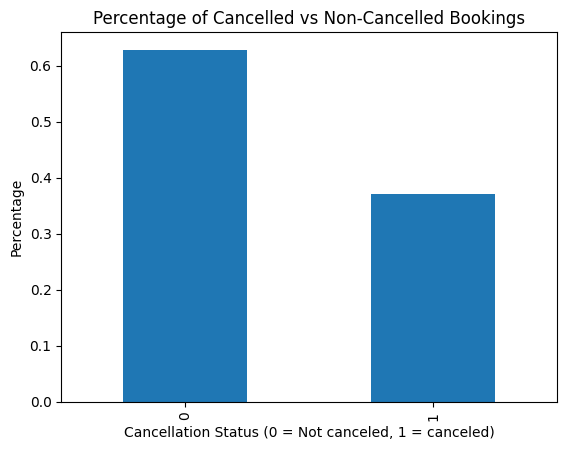

In [176]:
import matplotlib.pyplot as plt
cancelled_perc.plot(kind='bar')
plt.title('Percentage of Cancelled vs Non-Cancelled Bookings')
plt.xlabel('Cancellation Status (0 = Not canceled, 1 = canceled)')
plt.ylabel('Percentage')
plt.show()

## Cancellation Comparison Between Hotel Types

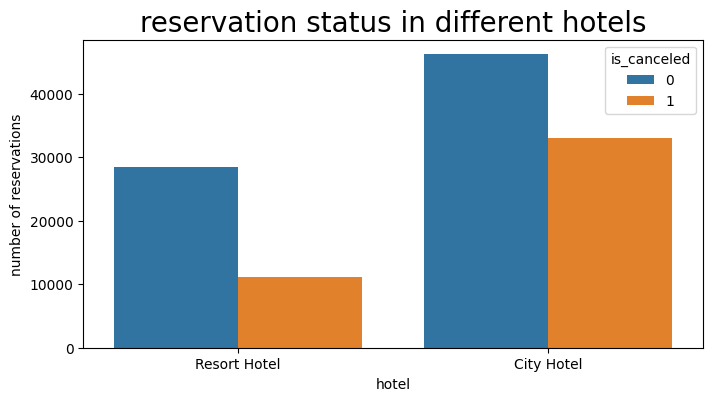

In [177]:
plt.figure(figsize=(8,4))
ax1=sns.countplot(x='hotel',hue='is_canceled',data=df)
plt.title('reservation status in different hotels',size=20)
plt.xlabel('hotel')
plt.ylabel('number of reservations')
plt.show()
           

## Cancellation Rate – Resort Hotel Only

In [178]:
resort_hotel=df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)


is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

## Cancellation Rate – City Hotel Only

In [179]:
city_hotel=df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)


is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

## Comparing Cancellation Rates for Both Hotels

In [180]:
analysis = pd.DataFrame({
    'Resort Hotel': resort_hotel['is_canceled'].value_counts(normalize=True),
    'City Hotel': city_hotel['is_canceled'].value_counts(normalize=True)
})
analysis


,Resort Hotel,City Hotel
is_canceled,,
0,0.72025,0.582918
1,0.27975,0.417082


## Calculating Average Daily Rate (ADR) Over Time

In [181]:
resort_hotel=resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel=city_hotel.groupby('reservation_status_date')[['adr']].mean()

##  ADR Trend Over Time – City vs Resort Hotel

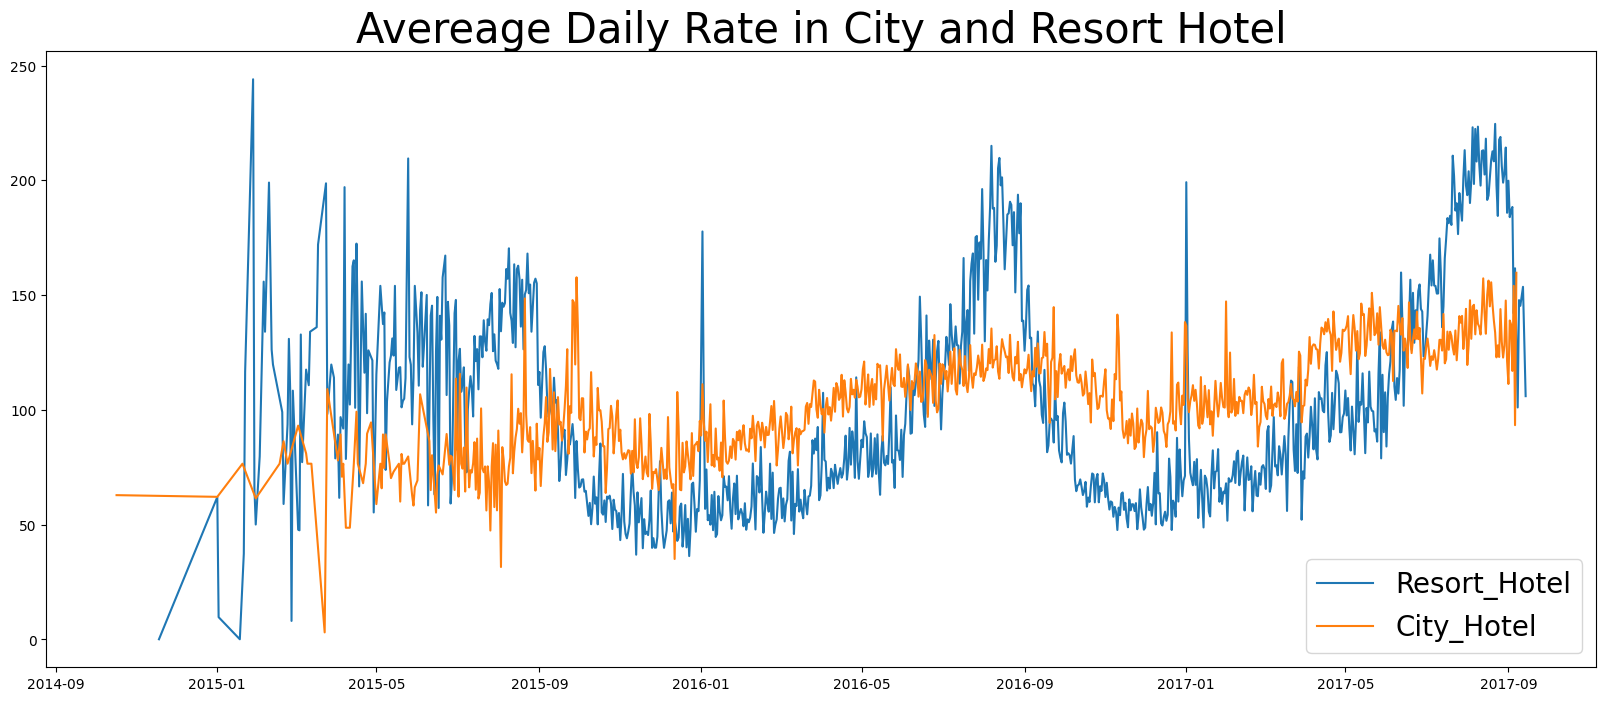

In [182]:
plt.figure(figsize=(20,8))
plt.title('Avereage Daily Rate in City and Resort Hotel',fontsize=30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label='Resort_Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label='City_Hotel')
plt.legend(fontsize=20)
plt.show()

## Monthly Cancellation Trend

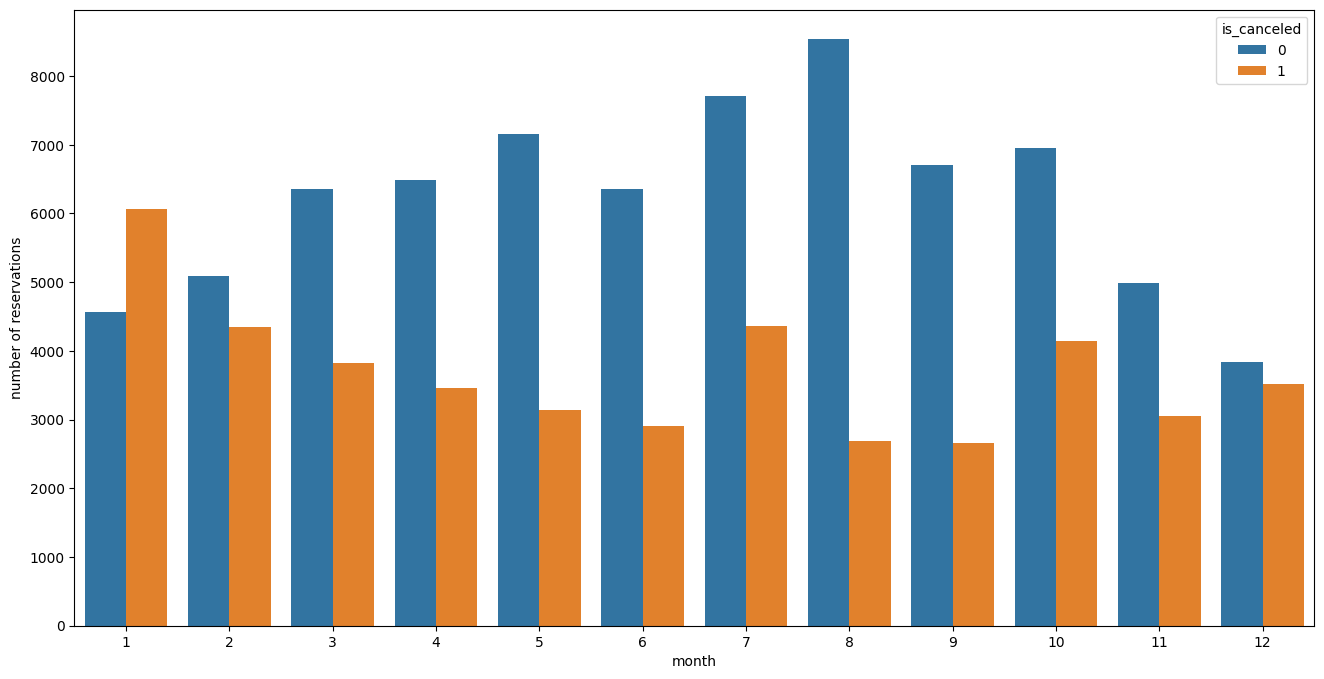

In [183]:
df['month']=df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
ax1=sns.countplot(x='month', hue='is_canceled', data=df)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.show()

##  Finding Factors That Affect Cancellations

In [184]:
df['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

In [185]:
df.groupby('lead_time')['is_canceled'].mean().sort_values(ascending=False)
df.groupby('market_segment')['is_canceled'].mean().sort_values(ascending=False)
df.groupby('stays_in_weekend_nights')['is_canceled'].mean().sort_values(ascending=False)
df.groupby('customer_type')['is_canceled'].mean().sort_values(ascending=False)


customer_type
Transient          0.408857
Contract           0.309617
Transient-Party    0.254127
Group              0.101754
Name: is_canceled, dtype: float64

## ADR Trend Over Month

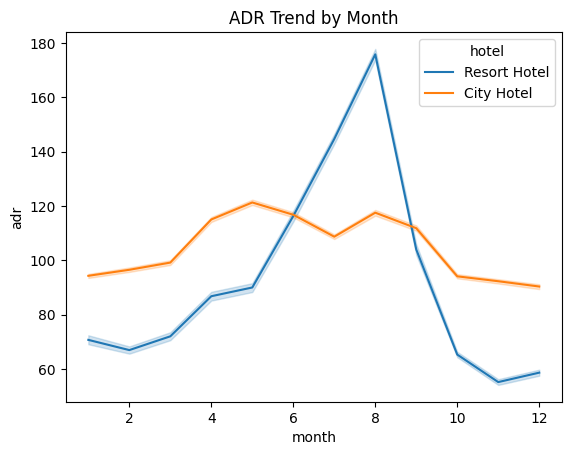

In [186]:
df['month'] = df['reservation_status_date'].dt.month
sns.lineplot(x='month', y='adr', hue='hotel', data=df)
plt.title('ADR Trend by Month')
plt.show()


In [187]:
df.groupby('market_segment')['is_canceled'].mean()\
  .sort_values(ascending=False)


market_segment
Groups           0.610775
Online TA        0.367682
Offline TA/TO    0.342605
Aviation         0.219409
Corporate        0.191352
Direct           0.154242
Complementary    0.122616
Name: is_canceled, dtype: float64

## Market Segment Impact

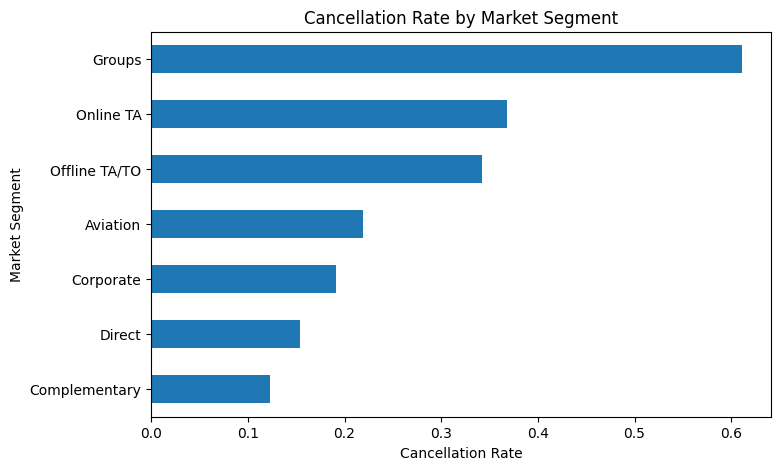

In [188]:
df.groupby('market_segment')['is_canceled'].mean().sort_values()\
    .plot(kind='barh', figsize=(8,5))
plt.title('Cancellation Rate by Market Segment')
plt.xlabel('Cancellation Rate')
plt.ylabel('Market Segment')
plt.show()


## Revenue Comparison

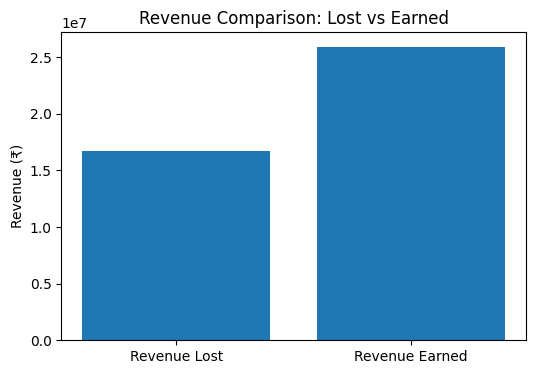

In [192]:
plt.figure(figsize=(6,4))
plt.bar(['Revenue Lost', 'Revenue Earned'], [revenue_lost, revenue_kept])
plt.title('Revenue Comparison: Lost vs Earned')
plt.ylabel('Revenue (₹)')
plt.show()


## 📌 Key Insights

- Overall cancellation rate is **37.2%** → very high for profitability.
- **Group** & **Transient** customers cancel the most.
- **Online TA** are the second highest cancellation customers.
- **Direct bookings** result in lowest cancellations → target them more.
- Some high-ADR months show higher cancellations, but price alone is **not a strong predictor** of cancellation.

---
## 💡 Business Recommendations

✔ Implement **dynamic pricing** for high-cancellation months.  
✔ Offer **discounts to loyal/direct customers** to retain them.  
✔ Improve **booking transparency** on OTAs (avoid misleading photos).  
✔ Use **targeted marketing** for “Transient” & “Group” travelers.  
✔ Push customers to **book directly** → higher revenue & lower cancellation.

---
## 📈 Potential Business Impact

| Metric | Before | After (Expected) |
|-------|-------|-------------------|
| Cancellation Rate | 37% | ↓ 25–28% |
| Avg. Revenue/Booking | ₹102 | ↑ ₹130 |
| Direct Bookings | 18% | ↑ 30% |

---
## 🎯 Final Conclusion

Reducing cancellations by even **10%** can increase revenue by **15–20%**.  
Hotel should **revise OTA strategy**, improve **customer retention**, and **optimize pricing** based on demand + seasonality.
